In [597]:
# IMPORT DES LIBRAIRIES
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import importlib
import func as f
importlib.reload(f)
from skimage import data, color
from PIL import Image

## IMAGE TEST 1 / COMPARAISON FILTRES

Text(0.5, 1.0, 'Filtre guidé')

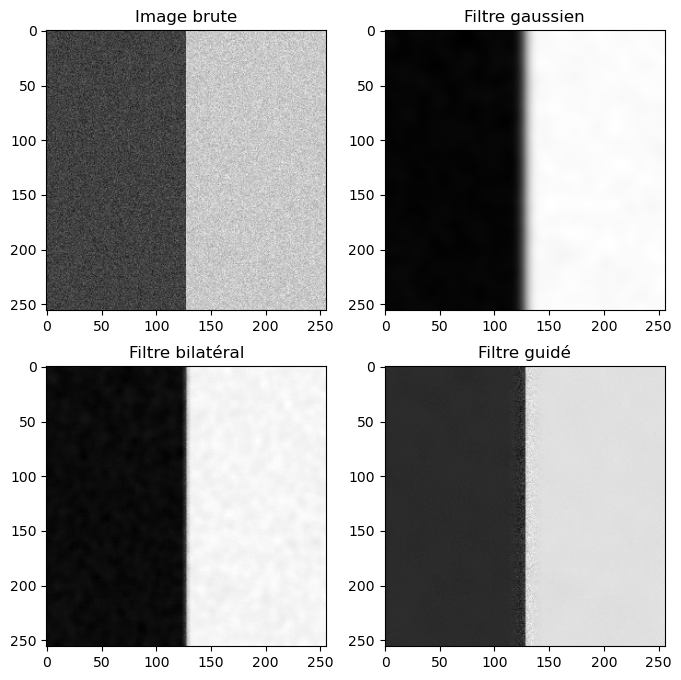

In [493]:
# -----------------------------------------------------------------------
# CREATION DE L'IMAGE TEST
# Taille du tableau
N = 256

# Création du tableau avec des 0 partout
p0 = np.zeros((N, N))

# Mettre des 1 dans la moitié droite
p0[:, N//2:] = 1

bruit = np.random.normal(loc=0, scale=0.1, size=(N, N))
p_bruite = p0 + bruit

# Renormalisation entre 0 et 1
p1 = (p_bruite - np.min(p_bruite)) / (np.max(p_bruite) - np.min(p_bruite))
img1 = p1.copy()
# -----------------------------------------------------------------------
# FILTRE GAUSSIEN
sigS = 5 # écart-type pour l'espace
img2 = cv2.GaussianBlur(p1, (0,0), sigmaX = sigS)
# -----------------------------------------------------------------------
# FILTRE BILATERAL
sigS = 5 # écart-type pour l'espace
sigR = 0.4 # écart-type pour la couleur
diam = 2 * sigS # diamètre de la fenêtre
p1 = p1.astype(np.float32)
img3 = cv2.bilateralFilter(p1, d=diam, sigmaSpace=sigS, sigmaColor=sigR)
# -----------------------------------------------------------------------
# FILTRE GUIDE
romega = 8 # rayon de la fenêtre
epsilon = 0.2 **2 # paramètre de régularisation
img4 = f.guided_f_fast2(p1,p1,romega,epsilon)
# -----------------------------------------------------------------------
# AFFICHAGE DES IMAGES
# Créer une figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Afficher chaque image
axes[0, 0].imshow(img1, cmap='gray')
axes[0, 0].set_title("Image brute")

axes[0, 1].imshow(img2, cmap='gray')
axes[0, 1].set_title("Filtre gaussien")

axes[1, 0].imshow(img3, cmap='gray')
axes[1, 0].set_title("Filtre bilatéral")

axes[1, 1].imshow(img4, cmap='gray')
axes[1, 1].set_title("Filtre guidé")

## IMAGE REELLE 1 / COMPARAISON FILTRES

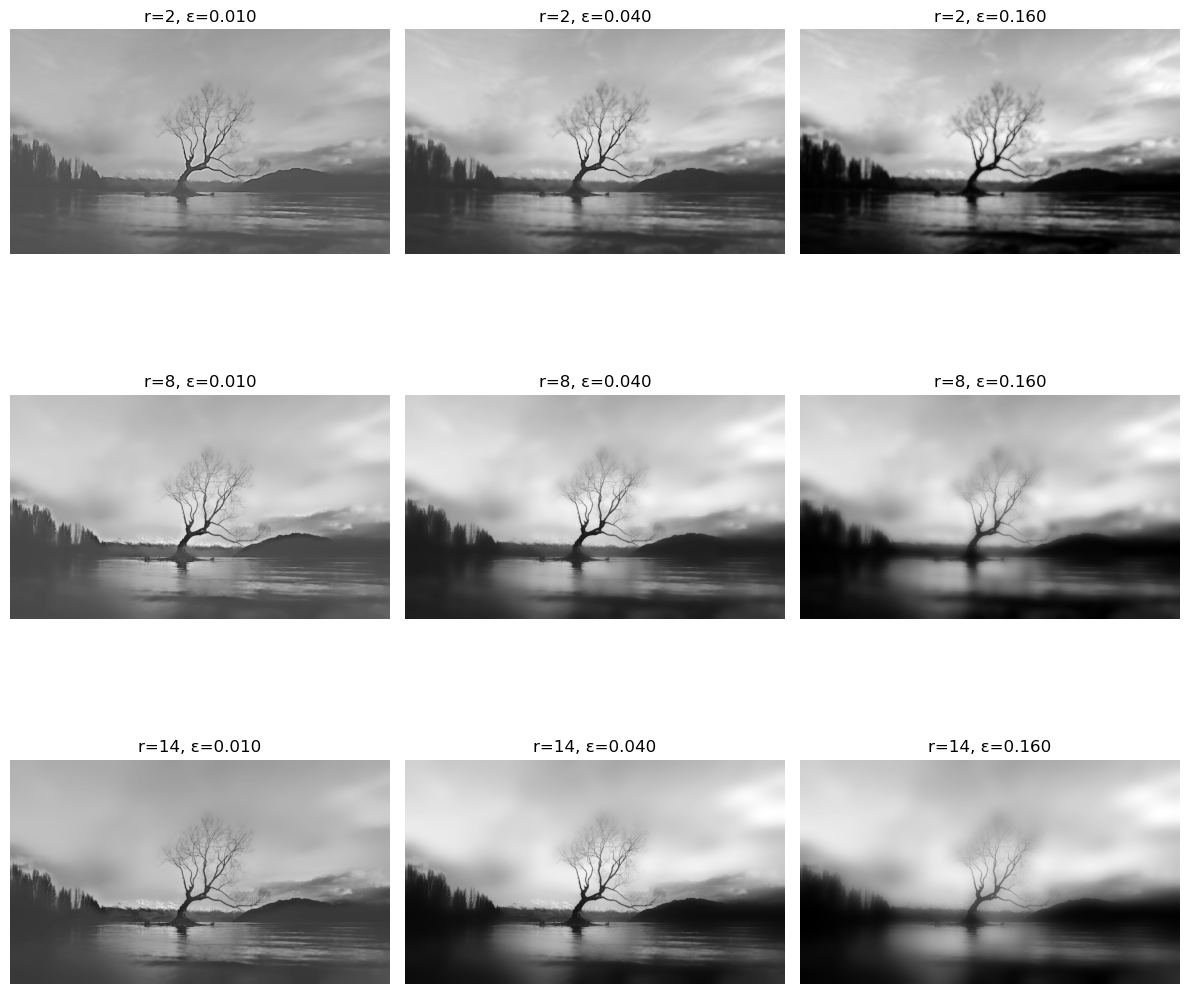

In [591]:
# -----------------------------------------------------------------------
# IMAGE REELLE
# Ouvrir l'image
p = plt.imread('arbreg.jpeg')
p = p-np.min(p)
p = p/np.max(p)

ranger = np.array([2, 8, 14])
rangeeps = np.array([0.1, 0.2, 0.4])
f.compare_parameters_fg(p,ranger,rangeeps,0,0,0)

## IMAGE TEST 2 / COMPARAISON PARAMETRES

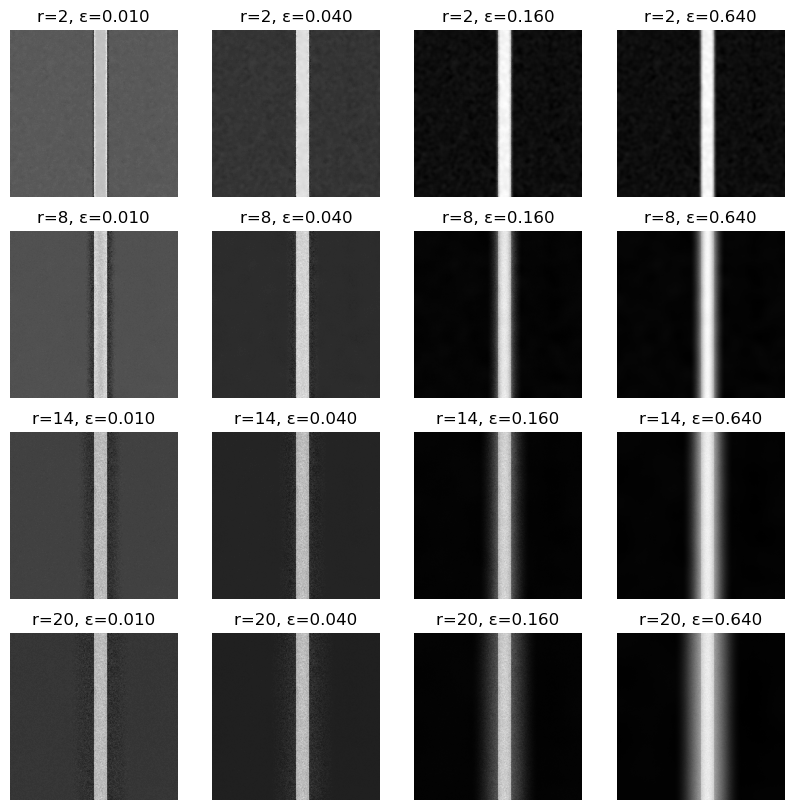

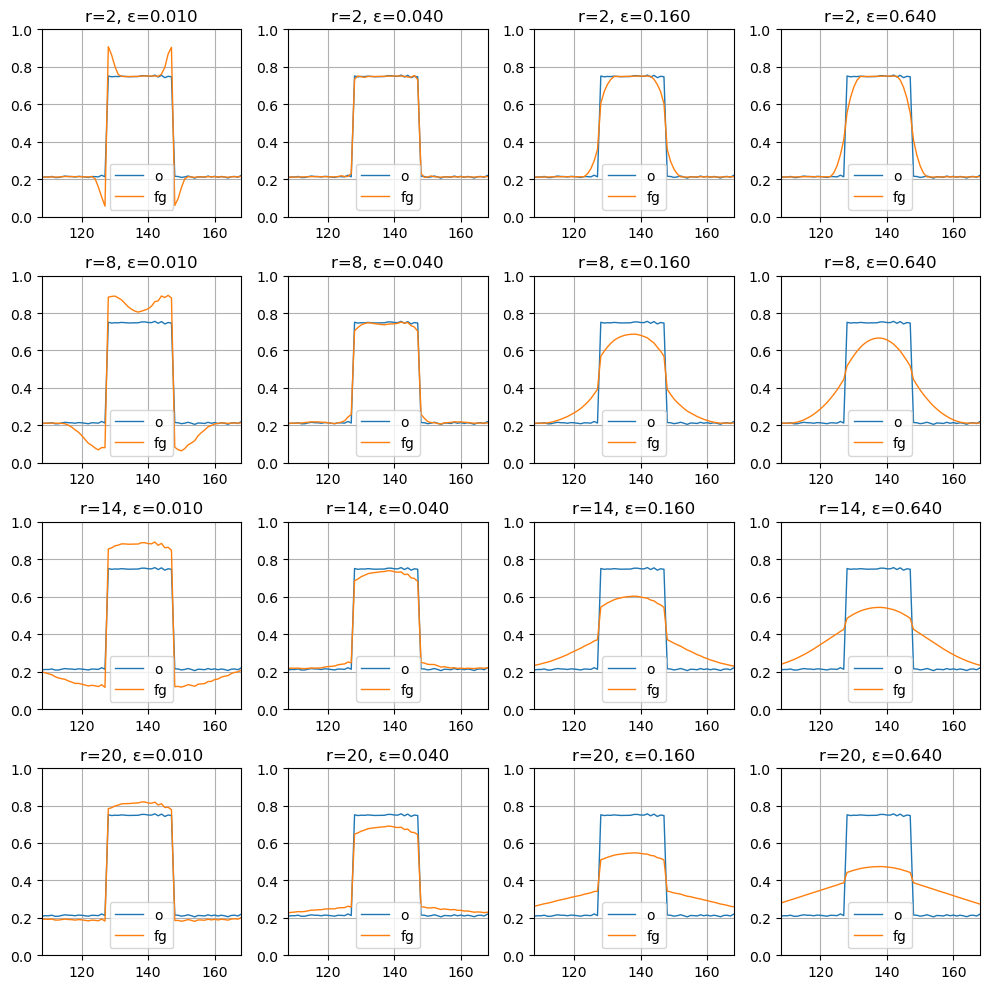

In [495]:
# -----------------------------------------------------------------------
# CREATION DE L'IMAGE TEST
# Taille du tableau
N = 256

# Création du tableau avec des 0 partout
p0 = np.zeros((N, N))

# Mettre des 1 sur une bande verticale
ep = 20
p0[:,N//2:N//2+ep] = 1

bruit = np.random.normal(loc=0, scale=0.1, size=(N, N))
p_bruite = p0 + bruit

# Renormalisation entre 0 et 1
p1 = (p_bruite - np.min(p_bruite)) / (np.max(p_bruite) - np.min(p_bruite))

ranger = np.array([2, 8, 14, 20])
rangeeps = np.array([0.1, 0.2, 0.4, 0.8])
xmin = N//2 - 20
xmax = N//2 + ep + 20
f.compare_parameters_fg(p1,ranger,rangeeps,xmin,xmax,1)


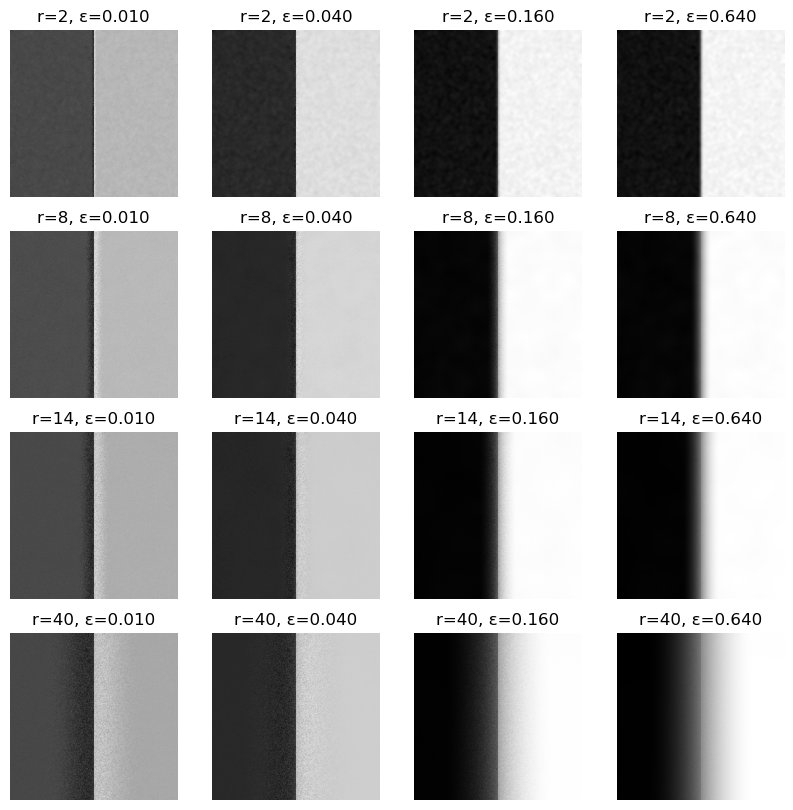

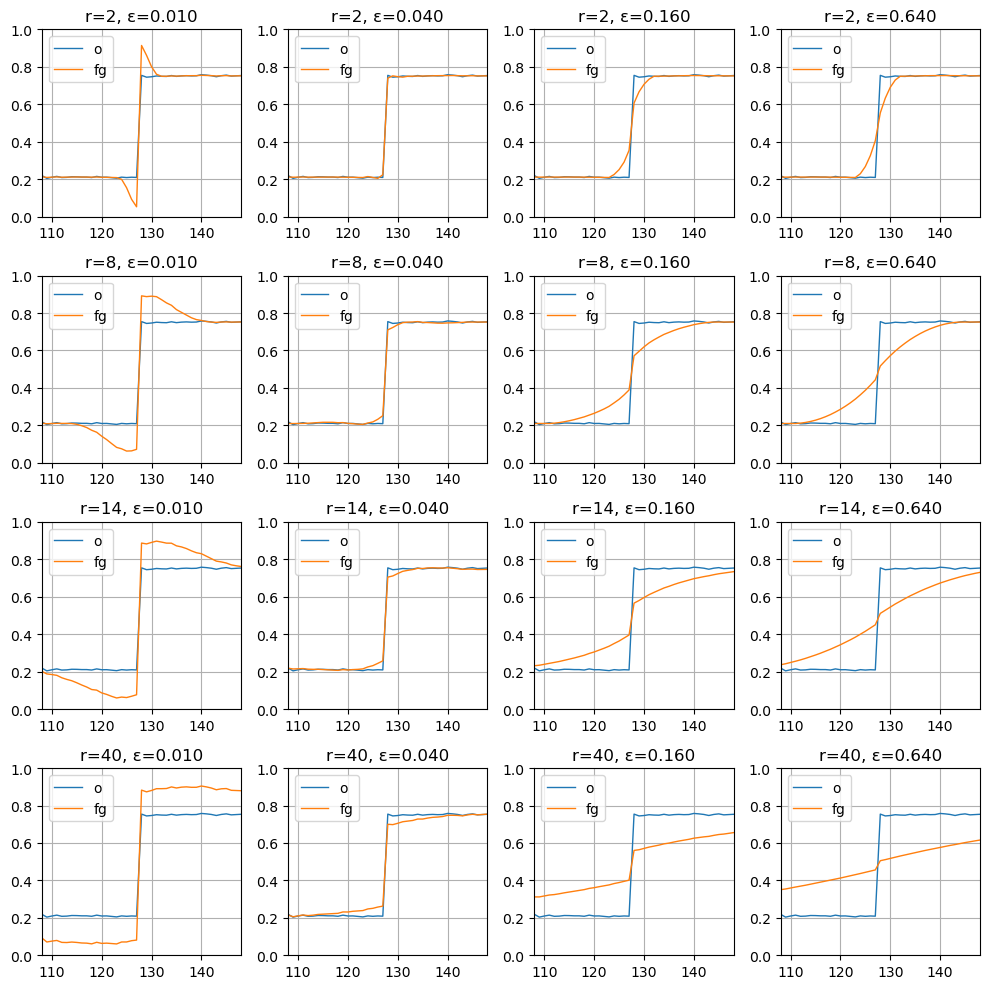

In [ ]:
# -----------------------------------------------------------------------
# CREATION DE L'IMAGE TEST
# Taille du tableau
N = 256

# Création du tableau avec des 0 partout
p0 = np.zeros((N, N))

# Mettre des 1 dans la moitié droite
p0[:, N//2:] = 1

bruit = np.random.normal(loc=0, scale=0.1, size=(N, N))
p_bruite = p0 + bruit

# Renormalisation entre 0 et 1
p1 = (p_bruite - np.min(p_bruite)) / (np.max(p_bruite) - np.min(p_bruite))
img1 = p1.copy()
prof0 = np.mean(img1, axis=0)

ranger = np.array([2, 8, 14, 20])
rangeeps = np.array([0.1, 0.2, 0.4, 0.8])
xmin = N//2 - 20
xmax = N//2 + 20
f.compare_parameters_fg(p1,ranger,rangeeps,xmin,xmax,1)

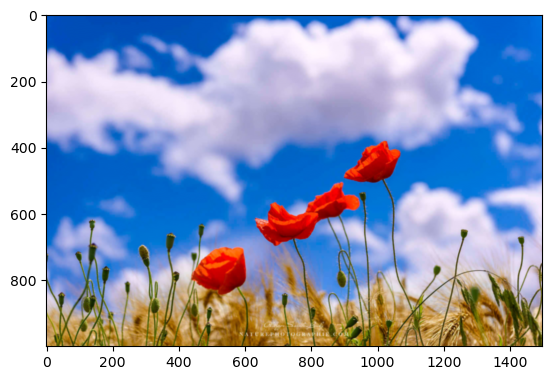

In [593]:
# -----------------------------------------------------------------------
# IMAGE REELLE
# Charger l'image
p = plt.imread('fleur2.jpg')
p = p/255


romega = 1 # rayon de la fenêtre
epsilon = 0.8 **2 # paramètre de régularisation
q = f.guided_f_fast3(p, p, romega, epsilon)
q = np.clip(q, 0, 1)  # Assurer que les valeurs sont dans la plage [0, 1]
plt.imshow(q)

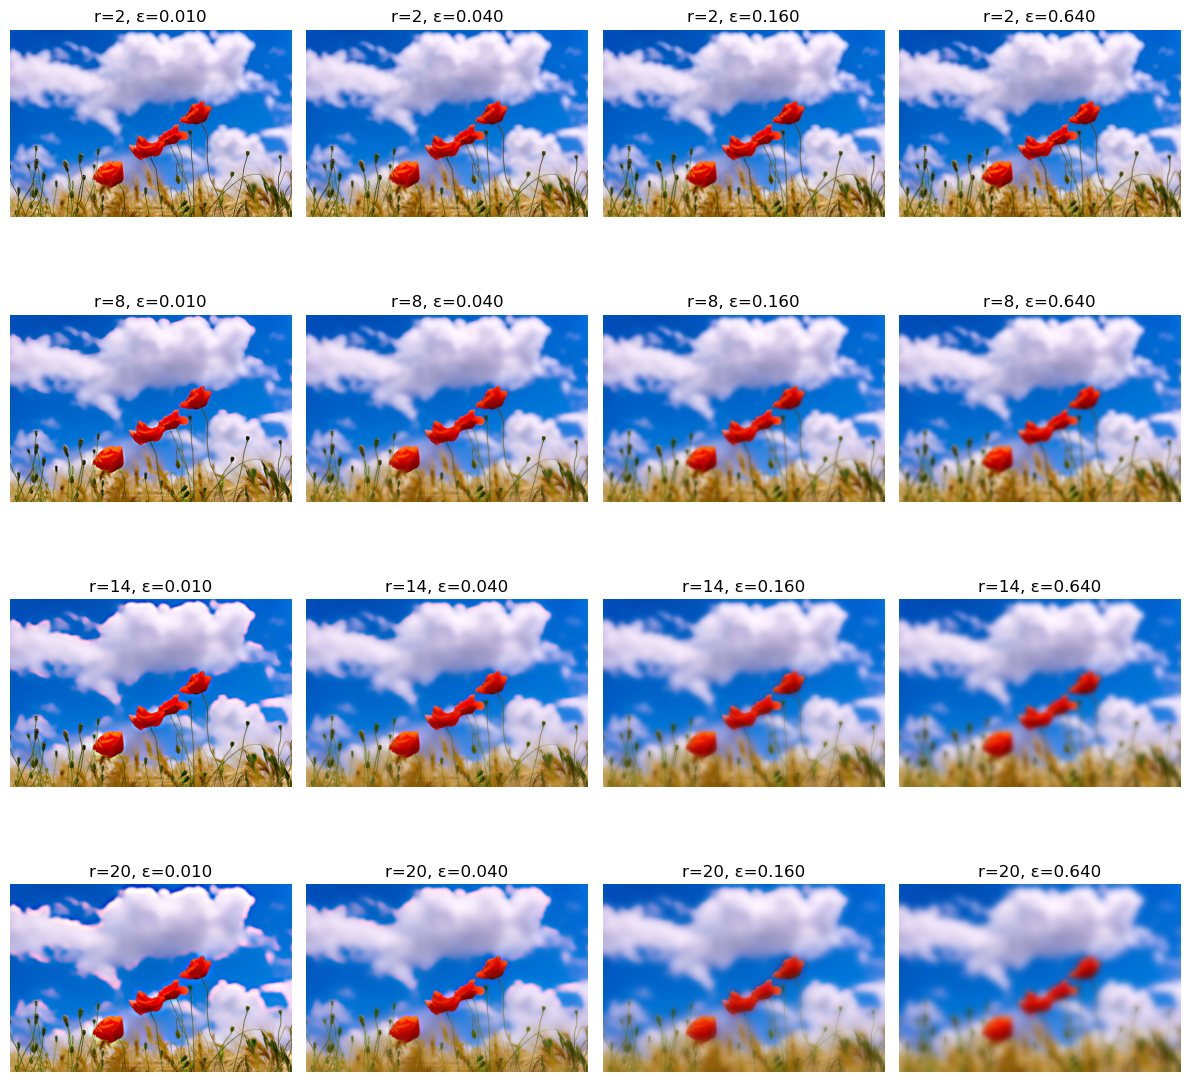

In [600]:
# -----------------------------------------------------------------------
# IMAGE REELLE
# Charger l'image
p = plt.imread('fleur2.jpg')
p = p/255

ranger = np.array([2, 8, 14, 20])
rangeeps = np.array([0.1, 0.2, 0.4, 0.8])
f.compare_parameters_fg(p,ranger,rangeeps,0,0,0)